# Collaboration and Competition

---
Please Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. DDPG Agents Initialization

In [6]:
from ddpg_agent import Agent
import torch
import random
import time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 7
train_mode = True

# Create one brain agent having one Reply memory buffer collecting experience from both tennis agents
agent = Agent(state_size=state_size, action_size=action_size, random_seed=random_seed)

### 4. Train the Agents using DDPG

Function Definiton to train the Agents using DDPG

In [7]:
def ddpg_tennis(n_episodes=2000, max_t=2000, print_every=1, save_every=50, learn_every=5, num_learn=10, goal_score=0.5):
    total_scores_deque = deque(maxlen=100)
    total_scores = []
    
    for i_episode in range(1, n_episodes+1):
        
        # Reset Env and Agent
        env_info = env.reset(train_mode=train_mode)[brain_name]  # reset the environment    
        states = env_info.vector_observations                    # get the current state (for each agent)
        scores = np.zeros(num_agents)                            # initialize the score (for each agent)
        agent.reset()
        
        start_time = time.time()
        
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]            # send all actions to the environment
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                          # get reward (for each agent)
            
            dones = env_info.local_done                         # see if episode finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # send actions to the agent
            
            scores += env_info.rewards                           # update the score (for each agent)
            states = next_states                                 # roll over states to next time step
            
            if t%learn_every == 0:
                for _ in range(num_learn):
                    agent.start_learn()
            
            if np.any(dones):                                   # exit loop if episode finished
                break
    
        mean_score = np.mean(scores)
        min_score = np.min(scores)
        max_score = np.max(scores)
        
        # Take max of all agents' scores
        total_scores_deque.append(max_score)
        total_scores.append(max_score)
        total_average_score = np.mean(total_scores_deque)
        duration = time.time() - start_time
        

        if i_episode % print_every == 0:
            print('\rEpisode#=> {}\tTotal Average Score=> {:.2f}\tMean=> {:.2f}\tMin=> {:.2f}\tMax: {:.2f}\tTime Duration=> {:.2f}'.format(i_episode, total_average_score, mean_score, min_score, max_score, duration))

        if i_episode % save_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if total_average_score >= goal_score and i_episode >= 100:
            print('!!!!!Problem Been Solved after {} # Episodes!!!! Total Average score=> {:.2f}'.format(i_episode, total_average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return total_scores

#### Execute the code cell below to train the Agents using DDPG

In [8]:
ddpg_scores = ddpg_tennis()

Episode#=> 1	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.08
Episode#=> 2	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 1.31
Episode#=> 3	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 4	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 5	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 6	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 7	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 8	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 9	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 10	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.05
Episode#=> 11	Total Average Score=> 0.0

/home/workspace/ddpg_agent.py:104: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode#=> 18	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.28
Episode#=> 19	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.57
Episode#=> 20	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.57
Episode#=> 21	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.57
Episode#=> 22	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.56
Episode#=> 23	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.56
Episode#=> 24	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.57
Episode#=> 25	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.56
Episode#=> 26	Total Average Score=> 0.00	Mean=> 0.05	Min=> -0.01	Max: 0.10	Time Duration=> 1.33
Episode#=> 27	Total Average Score=> 0.00	Mean=> -0.00	Min=> -0.01	Max: 0.00	Time Duration=> 0.56
Episode#=> 28	Total Average Sco

### 5. Plots of scores

Average Score computations and plot the scores with respect to # Episodes.

In [9]:
boundary = [0.5] * len(ddpg_scores)
N = 100
cumsum, moving_aves = [0], []

for i, x in enumerate(ddpg_scores, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
l = [None] * (N-1)
l.extend(moving_aves)

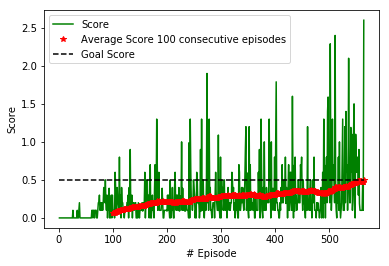

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(ddpg_scores)+1), ddpg_scores,'g', label='Score')
plt.plot(np.arange(1, len(l)+1), l, 'r*',label='Average Score 100 consecutive episodes')
plt.plot(np.arange(1, len(boundary)+1), boundary, 'k--' ,label='Goal Score')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('# Episode')
plt.show()

### 6. Agent using the saved weights to execute

In [11]:
# Load the saved weights into Pytorch model
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location='cpu'))

for i in range(100):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                        # select actions from loaded model agent
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (average for all agents) in #Episode{} => {}'.format(i,np.mean(scores)))

Total score (average for all agents) in #Episode0 => -0.004999999888241291
Total score (average for all agents) in #Episode1 => 0.04500000085681677
Total score (average for all agents) in #Episode2 => 1.7450000261887908
Total score (average for all agents) in #Episode3 => 0.29500000458210707
Total score (average for all agents) in #Episode4 => 0.04500000085681677
Total score (average for all agents) in #Episode5 => 1.3950000209733844
Total score (average for all agents) in #Episode6 => 2.1450000321492553
Total score (average for all agents) in #Episode7 => 2.095000031404197
Total score (average for all agents) in #Episode8 => 0.245000003837049
Total score (average for all agents) in #Episode9 => 0.19500000309199095
Total score (average for all agents) in #Episode10 => 0.3450000053271651
Total score (average for all agents) in #Episode11 => 2.600000038743019
Total score (average for all agents) in #Episode12 => -0.004999999888241291
Total score (average for all agents) in #Episode13 => 

In [17]:
#close the environment
env.close()